In [1]:
from discrete import *
import numpy as np 
from numpy.random import randint, rand
import matplotlib.pyplot as plt


In [3]:
def count_infected(pop):
    return sum(p.is_infected() for p in pop)

def count_recovered(pop):
    return sum(p.is_recovered() for p in pop)

def count_susc(pop):
    return sum(p.is_susceptible() for p in pop)

def run_simulation(b, k, N=1_000, T=20):
    """
    return the number of people enlightened at time T
    """
    
    pop = [Agent() for i in range(N)] # our population
    pop[0].infect()
    counts_sus = [count_susc(pop)]
    counts_inf = [count_infected(pop)]
    counts_rec = [count_recovered(pop)]
    for t in range(T):
    # update the population
        for i in range(N):
            if pop[i].is_infected():
                for j in range(N):
                    if pop[j].is_susceptible():
                        if rand() < b:
                            pop[j].infect()        
                if rand() < k:
                    pop[i].recover()   
        counts_sus.append(count_susc(pop))
        counts_inf.append(count_infected(pop))
        counts_rec.append(count_recovered(pop))

    return counts_sus, counts_inf, counts_rec



Plot for b = 0.0005 and k = 0.02


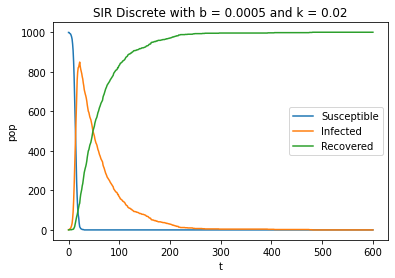

Plot for b = 0.0005 and k = 0.01


In [ ]:
bs = [0.0005, 0.0003, 0.0001]
ks = [0.02, 0.01, 0.001, 0.0001]
for b in bs:
    for k in ks:
        print("Plot for b = {} and k = {}".format(b, k))
        counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
        plt.plot(counts_sus, label='Susceptible')
        plt.plot(counts_inf, label='Infected')
        plt.plot(counts_rec, label='Recovered')
        plt.xlabel('t')
        plt.ylabel('pop')
        plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
        plt.legend()
        plt.show()

In [ ]:
cts

In [ ]:
# alternate way to do the plotting
T = 100 # number of days to simulate
b = 0.01
k = 0.05
N = 1000

pop = [Agent() for i in range(N)]
pop[0].infect()
counts = [count_infected(pop)]
for t in range(T):
    # update the population
    for i in range(N):
        if pop[i].is_infected():
            for j in range(N):
                if pop[j].is_susceptible():
                    if rand() < b:
                        pop[j].infect()        
            if rand() < k:
                pop[i].recover()                    
    # add to our counts
    counts.append(count_infected(pop))

plt.plot(counts)
plt.show()
plt.clf()